# Assignment 02 - Pump it Up: Data Mining the Water Table

#### Name: Oscar Violante
#### E-mail: o.violante@student.ie.edu


**Dataset**: Data from Taarifa and the Tanzanian Ministry of Water, downloaded from DrivenData (https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/)

**Assignment description**: Predict which pumps are functional, which need some repairs, and which are going to fail.

## 1. Data Loading

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns


In [2]:
# Size and style of graphs
rcParams['figure.figsize'] = 15,6
sns.set_style("whitegrid")

In [3]:
# Import training values and training lables and merge into one dataframe
train_values = pd.read_csv('C:\\Users\\oscar\\Documents\\MBD\\Term2\\MACHINE LEARNING II\\train.csv',parse_dates=True)
train_labels = pd.read_csv('C:\\Users\\oscar\\Documents\\MBD\\Term2\\MACHINE LEARNING II\\train_status_group.csv',parse_dates=True)
train = train_values.merge(train_labels, how = "outer", on = "id", sort = True)

In [4]:
train.shape

(59400, 41)

In [5]:
# Import testing set 
test = pd.read_csv('C:\\Users\\oscar\\Documents\\MBD\\Term2\\MACHINE LEARNING II\\test.csv',parse_dates=True)

In [6]:
test.shape

(14850, 40)

## 2. Data Understanding


In [7]:
# Preview train
train.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,0,0.0,2012-11-13,Tasaf,0,TASAF,33.125828,-5.118154,Mratibu,0,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
1,1,0.0,2011-03-05,Shipo,1978,SHIPO,34.770717,-9.395642,none,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
2,2,0.0,2011-03-27,Lvia,0,LVIA,36.115056,-6.279268,Bombani,0,...,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
3,3,10.0,2013-06-03,Germany Republi,1639,CES,37.147432,-3.187555,Area 7 Namba 5,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
4,4,0.0,2011-03-22,Cmsr,0,CMSR,36.164893,-6.099289,Ezeleda,0,...,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional


In [8]:
# Preview data
test.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [9]:
# Data types of features
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [10]:
# Which features contain missing values?
train.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

There are 7 columns containing missing values. We will inspect each column and impute the missing values in Secion 3.

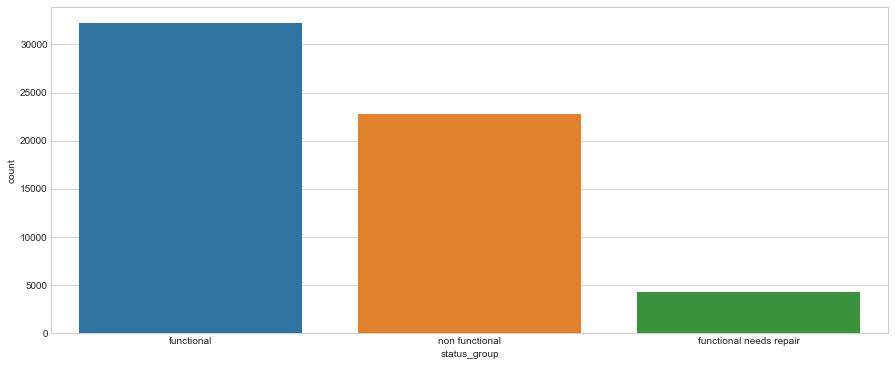

In [11]:
sns.countplot(x = 'status_group', data = train, order = train['status_group'].value_counts().index)

plt.show()

In [12]:
# Distribution of numeric variables
train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [13]:
#Distribution for string columns
train.describe(include=['O'])

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,59400,55765,55745,59400,59400,59029,59400,59400,59400,56066,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1897,2145,37400,9,19287,21,125,2092,2,...,8,6,5,5,10,7,3,7,6,3
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,...,50818,50818,33186,33186,17021,17021,45794,28522,34625,32259


In [14]:
# TO analyse status group per variable, we create add a new column for status_group
status_group_encoded = {'functional':2, 'functional needs repair':1,
                   'non functional':0}

train['status_group_encoded']  = train.status_group.replace(status_group_encoded)

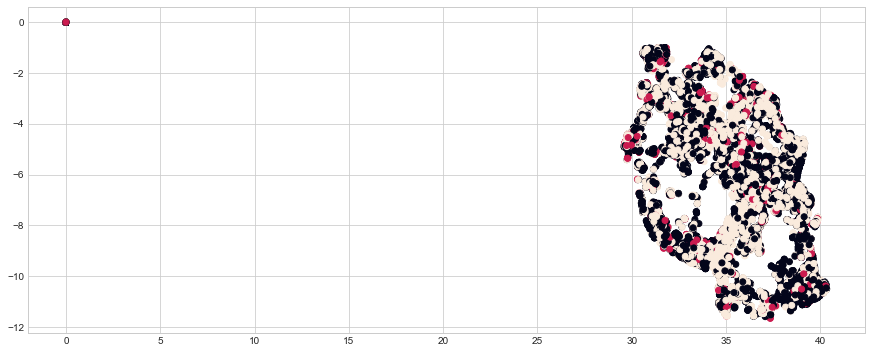

In [15]:
# Geographic Location of pumps by status_group --- Functioning, not funcitoning and to repair pumps seem to be distributed around the country.
plt.scatter(train['longitude'], train['latitude'], c = train["status_group_encoded"])

plt.show()

We delete the following columns:

- **id**: Not useful for our model. No information can be extracted from this.
- **amount_tsh**: Mostly NULLs.
- **wpt_name**: Too many different values. Not very useful for model.
- **scheme_name**: This is almost 50% nulls, so we will delete this column
- **num_private**: 99% of the values are zeros.
- **Geographic information**: gps_height', 'longitude', 'latitude', 'region_code', 'district_code' -- Correlated with each other , Little predictive power --> geo information included in other variables e.g. region

In [16]:
# We create a function to delete variables with little information and not relevant for our model

def removal():
   
    z = ['id', 'amount_tsh', 'num_private', 'wpt_name', 'scheme_name', 
         'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'lga', 'ward']
    for i in z:
        del train[i]
        del test[i]
    return

removal()


In [17]:
test.shape

(14850, 28)

## 3. Data Preparation

### NA Imputation

There are 7 variables that contain missing values. Before we continue we need to impute the missing values or decide if it makes sense to keep them.

In [18]:
#Feature 'Funder' -- Count different values
train.funder.value_counts()

Government Of Tanzania         9084
Danida                         3114
Hesawa                         2202
Rwssp                          1374
World Bank                     1349
Kkkt                           1287
World Vision                   1246
Unicef                         1057
Tasaf                           877
District Council                843
Dhv                             829
Private Individual              826
Dwsp                            811
0                               777
Norad                           765
Germany Republi                 610
Tcrs                            602
Ministry Of Water               590
Water                           583
Dwe                             484
Netherlands                     470
Hifab                           450
Adb                             448
Lga                             442
Amref                           425
Fini Water                      393
Oxfam                           359
Wateraid                    

In [19]:
# Keep Only 5 Top Funders, for the rest code as 'other'

def funder_grouping(row):  
    '''Keep top 5 values and set the rest to 'other'''

    if row['funder']=='Government Of Tanzania':
        return 'Government'
    elif row['funder']=='Danida':
        return 'Danida'
    elif row['funder']=='Hesawa':
        return 'Hesawa'
    elif row['funder']=='Rwssp':
        return 'Rwssp'
    elif row['funder']=='World Bank':
        return 'World_bank'    
    else:
        return 'Other'
    
train['funder'] = train.apply(lambda row: funder_grouping(row), axis=1)

# We perform the same on the test data set 
test['funder'] = test.apply(lambda row: funder_grouping(row), axis=1)


In [20]:
pd.pivot_table(train,index=['funder','status_group'],
                           values='status_group_encoded', aggfunc='count')

status_group_encoded
funder     status_group                                 
Danida     functional                               1713
           functional needs repair                   159
           non functional                           1242
Government functional                               3720
           functional needs repair                   701
           non functional                           4663
Hesawa     functional                                936
           functional needs repair                   232
           non functional                           1034
Other      functional                              24540
           functional needs repair                  3019
           non functional                          14718
Rwssp      functional                                805
           functional needs repair                   109
           non functional                            460
World_bank functional                                545
           functional needs repair                    97
           non functional                            707

In [21]:
# We do the same for installar
train.installer.value_counts()


DWE                           17402
Government                     1825
RWE                            1206
Commu                          1060
DANIDA                         1050
KKKT                            898
Hesawa                          840
0                               777
TCRS                            707
Central government              622
CES                             610
Community                       553
DANID                           552
District Council                551
HESAWA                          539
LGA                             408
World vision                    408
WEDECO                          397
TASAF                           396
District council                392
Gover                           383
AMREF                           329
TWESA                           316
WU                              301
Dmdd                            287
ACRA                            278
World Vision                    270
SEMA                        

In [22]:
# Keep Only 5 Top installers, for the rest code as 'other'

def installer_grouping(row):
    '''Keep top 5 values and set the rest to 'other'''
    if row['installer']=='DWE':
        return 'dwe'
    elif row['installer']=='Government':
        return 'Government'
    elif row['installer']=='RWE':
        return 'Rwe'
    elif row['installer']=='Commu':
        return 'Commu'
    elif row['installer']=='DANIDA':
        return 'Danida'
    else:
        return 'Other'  

train['installer'] = train.apply(lambda row: installer_grouping(row), axis=1)

# We perform the same on the test data set 
test['installer'] = test.apply(lambda row: installer_grouping(row), axis=1)


In [23]:
pd.pivot_table(train,index=['funder','status_group'],
                           values='status_group_encoded', aggfunc='count')

status_group_encoded
funder     status_group                                 
Danida     functional                               1713
           functional needs repair                   159
           non functional                           1242
Government functional                               3720
           functional needs repair                   701
           non functional                           4663
Hesawa     functional                                936
           functional needs repair                   232
           non functional                           1034
Other      functional                              24540
           functional needs repair                  3019
           non functional                          14718
Rwssp      functional                                805
           functional needs repair                   109
           non functional                            460
World_bank functional                                545
           functional needs repair                    97
           non functional                            707

In [24]:
# Now lets analyse subvillage

train.subvillage.value_counts()

Madukani        508
Shuleni         506
Majengo         502
Kati            373
Mtakuja         262
Sokoni          232
M               187
Muungano        172
Mbuyuni         164
Mlimani         152
Songambele      147
Msikitini       134
Miembeni        134
1               132
Kibaoni         114
Kanisani        111
I               109
Mapinduzi       109
Mjini           108
Mjimwema        108
Mkwajuni        104
Mwenge          102
Azimio           98
Mabatini         98
Mission          95
Mbugani          95
Bwawani          91
Bondeni          90
Chang'Ombe       88
Zahanati         86
               ... 
Mlukoyoyo         1
Makunguru         1
Ibororo           1
Nawav A           1
Igede             1
Mwanzoli          1
Pangaboi          1
Murubili          1
Ideganji          1
Migina            1
Nyakakoni         1
Mwanhugijo        1
Ugunga Kati       1
Ijombi            1
Ugwandege         1
Kimo              1
Nyang'Anga B      1
Nyamilanda A      1
Bulumbaga B       1


In [25]:
# Check number of unique values

len(train.subvillage.value_counts())

19287

In [26]:
# Since there are too many different values, we drop this column
train = train.drop('subvillage', axis=1)

#Same for test set
test = test.drop('subvillage', axis=1)

In [27]:
# Now lets analyse public_meeting
train.public_meeting.value_counts()


True     51011
False     5055
Name: public_meeting, dtype: int64

In [28]:
# We fill the missing values with 'Unknown'

train.public_meeting = train.public_meeting.fillna('Unknown')


# We perform the same on the test data
test.public_meeting = test.public_meeting.fillna('Unknown')


In [29]:
# Now lets analyse scheme_managment

train.scheme_management.value_counts()


VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [30]:
# Similar as we did with the installers and funders, we only keep the top5 

def scheme_grouping(row):
    '''Keep top 5 values and set the rest to 'other'. '''
    if row['scheme_management']=='VWC':
        return 'VWC'
    elif row['scheme_management']=='WUG':
        return 'WUG'
    elif row['scheme_management']=='Water authority':
        return 'Water_authority'
    elif row['scheme_management']=='WUA':
        return 'WUA'
    elif row['scheme_management']=='Water Board':
        return 'Water_Board'
    else:
        return 'Other'
    
train['scheme_management'] = train.apply(lambda row: scheme_grouping(row), axis=1)


# We perform the same on the test dataset
test['scheme_management'] = test.apply(lambda row: scheme_grouping(row), axis=1)


In [31]:
pd.pivot_table(train, index=['scheme_management', 'status_group'],
                           values='status_group_encoded', aggfunc='count')

status_group_encoded
scheme_management status_group                                 
Other             functional                               4627
                  functional needs repair                   513
                  non functional                           3477
VWC               functional                              18960
                  functional needs repair                  2334
                  non functional                          15499
WUA               functional                               1995
                  functional needs repair                   239
                  non functional                            649
WUG               functional                               3006
                  functional needs repair                   672
                  non functional                           1528
Water_Board       functional                               2053
                  functional needs repair                   111
                  non functional                            584
Water_authority   functional                               1618
                  functional needs repair                   448
                  non functional                           1087

In [32]:
# Not lets anaylse 'permit'

train.permit.value_counts()



True     38852
False    17492
Name: permit, dtype: int64

In [33]:
# We fill NA's with 'Unknown'

train.permit = train.permit.fillna('Unknown')

# We perform the same on the test data set

test.permit = test.permit.fillna('Unknown')


In [34]:
# NA Check on train data set
train.isnull().sum()

date_recorded            0
funder                   0
installer                0
basin                    0
region                   0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
status_group             0
status_group_encoded     0
dtype: int64

In [35]:
# NA Check on test data set
test.isnull().sum()

date_recorded            0
funder                   0
installer                0
basin                    0
region                   0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
dtype: int64

### String Variables

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 29 columns):
date_recorded            59400 non-null object
funder                   59400 non-null object
installer                59400 non-null object
basin                    59400 non-null object
region                   59400 non-null object
population               59400 non-null int64
public_meeting           59400 non-null object
recorded_by              59400 non-null object
scheme_management        59400 non-null object
permit                   59400 non-null object
construction_year        59400 non-null int64
extraction_type          59400 non-null object
extraction_type_group    59400 non-null object
extraction_type_class    59400 non-null object
management               59400 non-null object
management_group         59400 non-null object
payment                  59400 non-null object
payment_type             59400 non-null object
water_quality            59400 non-null object


In [37]:
train.date_recorded.describe()

count          59400
unique           356
top       2011-03-15
freq             572
Name: date_recorded, dtype: object

In [38]:
# Convert to daytime format
train.date_recorded = pd.to_datetime(train.date_recorded)
train.date_recorded.describe()

count                   59400
unique                    356
top       2011-03-15 00:00:00
freq                      572
first     2002-10-14 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

In [39]:
# Last recorded date is 2013-12-03. Lets calculate a day since last recorded. 
# Subtract each date from this last recorded to obtain this

train.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(train.date_recorded)
train.columns = ['days_since_recorded' if x=='date_recorded' else x for x in train.columns]
train.days_since_recorded = train.days_since_recorded.astype('timedelta64[D]').astype(int)
train.days_since_recorded.describe()

count    59400.000000
mean       613.616970
std        334.216374
min          0.000000
25%        297.000000
50%        419.000000
75%        977.000000
max       4068.000000
Name: days_since_recorded, dtype: float64

In [40]:
# Same to test data
test.date_recorded = pd.to_datetime(test.date_recorded)

In [41]:
# Same for test data set
test.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(test.date_recorded)
test.columns = ['days_since_recorded' if x=='date_recorded' else x for x in test.columns]
test.days_since_recorded = test.days_since_recorded.astype('timedelta64[D]').astype(int)

In [42]:
# Lets analyse now 'basin'
train.basin.value_counts()


Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [43]:
# Now by status_group
pd.pivot_table(train, index=['basin', 'status_group'],
                           values=['status_group_encoded'], aggfunc='count')

status_group_encoded
basin                   status_group                                 
Internal                functional                               4482
                        functional needs repair                   557
                        non functional                           2746
Lake Nyasa              functional                               3324
                        functional needs repair                   250
                        non functional                           1511
Lake Rukwa              functional                               1000
                        functional needs repair                   270
                        non functional                           1184
Lake Tanganyika         functional                               3107
                        functional needs repair                   742
                        non functional                           2583
Lake Victoria           functional                               5100
                        functional needs repair                   989
                        non functional                           4159
Pangani                 functional                               5372
                        functional needs repair                   477
                        non functional                           3091
Rufiji                  functional                               5068
                        functional needs repair                   437
                        non functional                           2471
Ruvuma / Southern Coast functional                               1670
                        functional needs repair                   326
                        non functional                           2497
Wami / Ruvu             functional                               3136
                        functional needs repair                   269
                        non functional                           2582

In [44]:
# 'basin' seems to be an interesting feature. 

In [45]:
train.region.value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

We drop this to simplify model. Geo Location information included in basin.

In [46]:
train = train.drop(['region'], axis=1)
test = test.drop(['region'], axis=1)


In [47]:
# We continue by analysing recorded_by
train.recorded_by.value_counts()


GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [48]:
# We drop this value since it does not contain any valuable information

train = train.drop('recorded_by', axis=1)
test = test.drop ('recorded_by', axis=1)

In [49]:
# Extraction_type, extraction_type_group and extraction_type_class contain the same infromation. We only keep one column
train = train.drop(['extraction_type', 'extraction_type_group'], axis=1)
test = test.drop(['extraction_type', 'extraction_type_group'], axis=1)


In [50]:
# Lets analyse  'management'
train.management.value_counts()


vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [51]:
# It is very similar to scheme_management, we drop this column

train = train.drop('management', axis=1)

test = test.drop('management', axis=1)


In [52]:
# We now analyse maagment_group

train.management_group.value_counts()


user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [53]:
# Little information, most rows populated with user-group. We drop this columns

train = train.drop('management_group', axis=1)
test = test.drop('management_group', axis=1)


In [54]:
# Now, we analyse 'payment' and 'payment_type'

train.payment.value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [55]:
train.payment_type.value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [56]:
# Payment and payment_type include the same infromation. We only keep one column

train = train.drop('payment_type', axis=1)
test = test.drop('payment_type', axis=1)

In [57]:
#Now, we will analyse the water_quality
train.water_quality.value_counts()


soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [58]:
# Now we anaylse the quality_group

train.quality_group.value_counts()


good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [59]:
# Water_quality and quality_group contain the almost the same information. We keep water_quality.

train = train.drop('quality_group', axis = 1)
test = test.drop('quality_group', axis = 1)

In [60]:
# Quantity and quantity_group
train.quantity.value_counts()


enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [61]:
train.quantity_group.value_counts()


enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [62]:
# Same information for both columns, we only keep one and drop the other one.
train = train.drop('quantity_group', axis= 1)
test = test.drop('quantity_group', axis =1)


In [63]:
# Now we analyse 'source'

train.source.value_counts()


spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [64]:
# Source_type seems to have the same information than source.
train.source_type.value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [65]:
# We drop source

train = train.drop('source', axis = 1)
test = test.drop('source', axis = 1)

In [66]:
# Source_class
train.source_class.value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [67]:
# Waterpoint_type
train.waterpoint_type.value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [68]:
# Waterpoint_type_group
train.waterpoint_type_group.value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [69]:
# Waterpoint_type and water_type_group contain the almost the same infromation. We drop waterpoint_type since it contains less infro.

train = train.drop('waterpoint_type', axis = 1)
test = test.drop('waterpoint_type', axis = 1)

### Numeric Variables

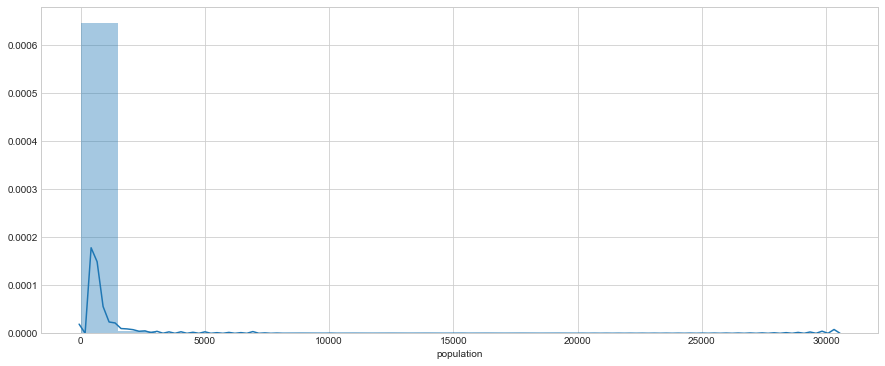

In [70]:
# Distribution population
sns.distplot(train.population, bins = 20)
plt.show()

In [71]:
# Uneven distribution. Some wells serve a few hundred people and some over 30000
train.population.describe()

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

In [72]:
# Construciton year

In [73]:
train.construction_year.value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

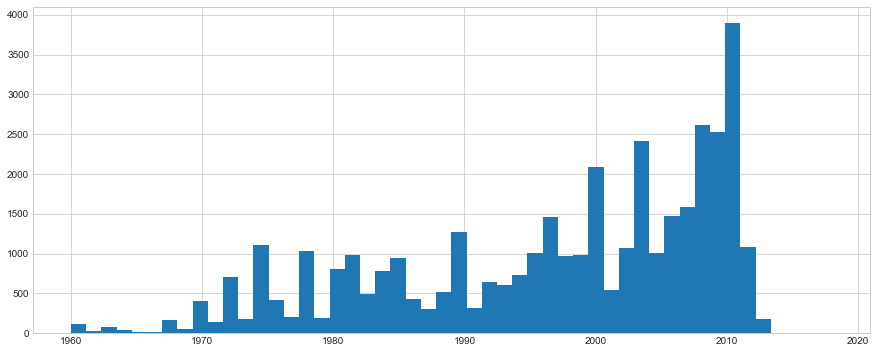

In [74]:
# Histogram exludin zeros
plt.hist(train['construction_year'], 50, range=[1960, 2018])

plt.show()


In [75]:
# Binning contruction_year

def construction_group(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '1960s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '1970s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '1980s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '1990s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '2000s'
    elif row['construction_year'] >= 2010:
        return '2010s'
    else:
        return 'unknown'
    

In [76]:
# We do it for the training and test set
train['construction_year'] = train.apply(lambda row: construction_group(row), axis=1)

test['construction_year'] = test.apply(lambda row: construction_group(row), axis=1)


## 4. Data Preparation

In [77]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 18 columns):
days_since_recorded      59400 non-null int32
funder                   59400 non-null object
installer                59400 non-null object
basin                    59400 non-null object
population               59400 non-null int64
public_meeting           59400 non-null object
scheme_management        59400 non-null object
permit                   59400 non-null object
construction_year        59400 non-null object
extraction_type_class    59400 non-null object
payment                  59400 non-null object
water_quality            59400 non-null object
quantity                 59400 non-null object
source_type              59400 non-null object
source_class             59400 non-null object
waterpoint_type_group    59400 non-null object
status_group             59400 non-null object
status_group_encoded     59400 non-null int64
dtypes: int32(1), int64(2), object(15)
memory us

In [78]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 16 columns):
days_since_recorded      14850 non-null int32
funder                   14850 non-null object
installer                14850 non-null object
basin                    14850 non-null object
population               14850 non-null int64
public_meeting           14850 non-null object
scheme_management        14850 non-null object
permit                   14850 non-null object
construction_year        14850 non-null object
extraction_type_class    14850 non-null object
payment                  14850 non-null object
water_quality            14850 non-null object
quantity                 14850 non-null object
source_type              14850 non-null object
source_class             14850 non-null object
waterpoint_type_group    14850 non-null object
dtypes: int32(1), int64(1), object(14)
memory usage: 1.8+ MB


In [79]:
train = train.drop('status_group_encoded', 1)


## Prediction test data

In [80]:
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

C:\Users\oscar\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\oscar\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [81]:
# Get dummy columns for the categorical columns and shuffle the data.

dummy_cols = ['funder', 'installer', 'basin', 'public_meeting', 'scheme_management', 'permit',
              'construction_year', 'extraction_type_class', 'payment', 'water_quality',
              'quantity', 'source_type', 'source_class',
             'waterpoint_type_group']

train = pd.get_dummies(train, columns = dummy_cols)

train = train.sample(frac=1).reset_index(drop=True)

In [82]:
test = pd.get_dummies(test, columns = dummy_cols)

In [83]:
# Let's split the train set into train and validation sets. Also remove the target.

target = train.status_group
features = train.drop('status_group', axis=1)

X_train, X_val, y_train, y_val  = train_test_split(features, target, train_size=0.8)

In [84]:
# We use a gradient boosting algorithm for the prediction

def model(X_train, X_val, y_train, y_val, test):
    if __name__ == '__main__':
    
        param_grid = {'learning_rate': [0.075, 0.7],
                      'max_depth': [13, 14],
                      'min_samples_leaf': [15, 16],
                      'max_features': [1.0],
                      'n_estimators': [100, 200]}                      

        estimator = GridSearchCV(estimator=GradientBoostingClassifier(),
                                 param_grid=param_grid,
                                 n_jobs=-1)

        estimator.fit(X_train, y_train)

        best_params = estimator.best_params_

        print (best_params)
                                 
        validation_accuracy = estimator.score(X_val, y_val)
        print('Validation accuracy: ', validation_accuracy)

In [85]:
model(X_train, X_val, y_train, y_val, test)

{'learning_rate': 0.075, 'max_depth': 13, 'max_features': 1.0, 'min_samples_leaf': 15, 'n_estimators': 100}
Validation accuracy:  0.79335016835


In [91]:
submit_loc = r"C:\\Users\\oscar\\Documents\\MBD\\Term2\\MACHINE LEARNING II\\submit.csv"
test_id = pd.read_csv(submit_loc)
test_id.columns = ['idd', 'status_group']
test_id = test_id.idd

In [103]:
def model_for_submission(features, target, test):
    if __name__ == '__main__':

         best_params = {'learning_rate': [0.075],
                        'max_depth': [14],
                        'min_samples_leaf': [16],
                        'max_features': [1.0],
                        'n_estimators': [100]}                      

         estimator = GridSearchCV(estimator=GradientBoostingClassifier(),
                                 param_grid=best_params,
                                 n_jobs=-1)

         estimator.fit(features, target)     

         predictions = estimator.predict(test)

         data = {'ID': test_id, 'status_group': predictions}

         submit = pd.DataFrame(data=data)

         vals_to_replace = {2:'functional', 1:'functional needs repair',
                           0:'non functional'}

         submit.status_group = submit.status_group.replace(vals_to_replace)        

         submit.to_csv('pump_predictions.csv', index=False, )

In [104]:
model_for_submission(features, target, test)